##**Aprendizaje Automático**
**Alumna:** Miriam Velazque
Enlace:  https://colab.research.google.com/drive/1pjoYesPTfPyLViEyB9EPDdoiQGbbZ5yQ?usp=sharing


##**Actividad 1** Relación lineal entre el PIB de países y el PIB mundial

Encontrar una posible relación lineal entre el PIB de diferentes países y el PIB mundial. El objetivo es identificar qué países (o combinación de países) explican mejor el comportamiento del PIB global.

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Carga y organización de los datos
# Cargar el archivo con separador ';' (delimiter=';' le dice a pandas que las columnas en el archivo están separadas
# por un punto y coma (;) y no por la coma (,) que es la opción por defecto

df = pd.read_csv('/pib_banco_mundial_50.csv', delimiter=';')

# Convertimos columnas de años a numéricas
anios = ['2019', '2020', '2021', '2022', '2023']
for col in anios:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Separamos el PIB mundial (array con los datos del PIB global total para cada año especificado)
pib_mundial = df[df['Country Name'] == 'World'][anios].values.flatten()

# Eliminamos la fila del PIB mundial para usar los países como variables
df_paises = df[df['Country Name'] != 'World']

pib_mundial

array([5.85757e+13, 6.45167e+13, 6.17213e+13, 6.39117e+13, 6.94809e+13])

In [ ]:
# Exploración de los datos (chequeo rápido de la calidad de los datos)

# Verificamos datos faltantes
print("Valores nulos por columna:")
print(df_paises[anios].isnull().sum())

# Visualizamos algunos países
print("Ejemplo de datos:")
print(df_paises[['Country Name'] + anios].head())


Valores nulos por columna:
2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64
Ejemplo de datos:
    Country Name          2019          2020          2021          2022  \
0      Argentina  1.492100e+12  5.090000e+11  2.781000e+11  7.350000e+11   
1         Brazil  8.961000e+11  2.279500e+12  1.978400e+12  1.322700e+12   
2  United States  2.164700e+12  6.277000e+11  6.323000e+11  1.705900e+12   
3          China  8.600000e+09  1.491000e+11  1.204200e+12  2.200000e+12   
4          India  8.261000e+11  1.537000e+12  2.098200e+12  2.001300e+12   

           2023  
0  1.361300e+12  
1  1.234500e+12  
2  1.531200e+12  
3  9.592000e+11  
4  1.486400e+12  


In [ ]:
# Modelado de regresión lineal (PIB de cada país como variables independientes (X)
# y el PIB mundial como variable dependiente (Y), año por año.)

# Transponemos los datos para que cada país sea una columna (variable predictora)
# se trasponen (.T) y se asignan los nombres de los países como nombres de las columnas del nuevo DataFrame X
X = df_paises[anios].T
X.columns = df_paises['Country Name'].values

# Variable objetivo: PIB mundial (se asigna el array pib_mundial)
Y = pib_mundial

# Previsualizo los cambios
X.head()

,Argentina,Brazil,United States,China,India,Germany,France,United Kingdom,Italy,Spain,...,Sweden,Norway,Denmark,Finland,Poland,Czech Republic,Hungary,Greece,Portugal,Netherlands
2019,1.492100e+12,8.961000e+11,2.164700e+12,8.600000e+09,8.261000e+11,1.740500e+12,6.020000e+11,2.299700e+12,7.559000e+11,3.763000e+11,...,2.296000e+12,8.252000e+11,1.230300e+12,5.497000e+11,2.031000e+11,1.820100e+12,2.118500e+12,7.337000e+11,1.138000e+11,9.981000e+11
2020,5.090000e+11,2.279500e+12,6.277000e+11,1.491000e+11,1.537000e+12,1.451500e+12,6.402000e+11,1.399400e+12,2.445200e+12,4.963000e+11,...,5.882000e+11,3.935000e+11,2.656000e+11,1.230000e+12,2.322400e+12,1.978400e+12,1.562700e+12,3.544000e+11,1.863200e+12,2.374600e+12
2021,2.781000e+11,1.978400e+12,6.323000e+11,1.204200e+12,2.098200e+12,1.356700e+12,1.836300e+12,7.928000e+11,7.028000e+11,5.665000e+11,...,7.828000e+11,1.992000e+11,1.491300e+12,1.856500e+12,2.116300e+12,3.443000e+11,2.447900e+12,5.649000e+11,1.225700e+12,2.095300e+12
2022,7.350000e+11,1.322700e+12,1.705900e+12,2.200000e+12,2.001300e+12,1.823800e+12,2.447700e+12,1.191400e+12,1.006100e+12,6.679000e+11,...,1.316100e+12,1.422300e+12,2.127700e+12,6.803000e+11,1.494800e+12,1.727000e+11,2.110900e+12,3.052000e+11,4.290000e+10,1.860600e+12
2023,1.361300e+12,1.234500e+12,1.531200e+12,9.592000e+11,1.486400e+12,4.185000e+11,1.799200e+12,2.180100e+12,1.090600e+12,7.281000e+11,...,1.692700e+12,1.394500e+12,6.452000e+11,2.243000e+12,1.479800e+12,1.176500e+12,1.707900e+12,1.391700e+12,2.257800e+12,1.628000e+12


In [ ]:
# Creamos el modelo.
# El algoritmo aprende la relación entre las variables independientes (X, los PIB de cada país) y la variable dependiente (Y, el PIB mundial).
modelo = LinearRegression()
modelo.fit(X, Y)

# Predicción
Y_pred = modelo.predict(X)

# Métricas
print("Error cuadrático medio:", round(mean_squared_error(Y, Y_pred), 2))
print("R²:", round(r2_score(Y, Y_pred), 2))


Error cuadrático medio: 0.0
R²: 1.0


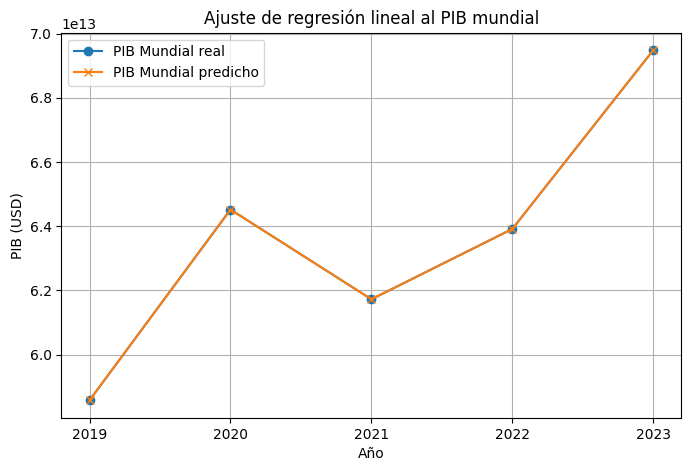

In [ ]:
# Visualización del ajuste
plt.figure(figsize=(8,5))
plt.plot(anios, Y, label='PIB Mundial real', marker='o')
plt.plot(anios, Y_pred, label='PIB Mundial predicho', marker='x')
plt.title('Ajuste de regresión lineal al PIB mundial')
plt.xlabel('Año')
plt.ylabel('PIB (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Análisis de contribución por país
# Coeficientes por país
coeficientes = pd.Series(modelo.coef_, index=X.columns)
coef_ordenados = coeficientes.sort_values(ascending=False)

print("Países con mayor peso en la predicción del PIB mundial:")
print(coef_ordenados.head(10))


Países con mayor peso en la predicción del PIB mundial:
Colombia        0.651401
South Korea     0.617141
Portugal        0.601615
Vietnam         0.520269
Thailand        0.438382
Chile           0.422203
South Africa    0.415733
Norway          0.399433
Bolivia         0.364960
Finland         0.350629
dtype: float64


##**Conclusión**
El modelo de regresión lineal permite identificar qué países tienen mayor correlación con el PIB mundial.
Los coeficientes más altos indican mayor influencia en la predicción.
Este análisis puede servir como base para estudios económicos, geopolíticos o decisiones de inversión.

##**Actividad 2** Clasificación de usuarios por sistema operativo

Para esta actividad se ha creado un archivo usuarios_win_mac_lin.csv con datos de
entrada a modo de ejemplo para clasificar si el usuario que visita un sitio web usa
como sistema operativo Windows, Macintosh o Linux.

Nuestra información de entrada son 4 características que se tomó de una web que utiliza
Google Analytics y son:

● Duración de la visita en Segundos

● Cantidad de Páginas Vistas durante la Sesión

● Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc)

● Suma del Valor de las acciones (cada acción lleva asociada una valoración
de importancia)

Como la salida es discreta, asignaremos los siguientes valores a las etiquetas:

0 – Windows

1 – Macintosh

2 -Linux

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Carga y exploración de los datos

# Cargar el archivo CSV
df = pd.read_csv('/usuarios_win_mac_lin.csv', delimiter=',')

# Vista inicial
print("Primeras filas del dataset:")
print(df.head())

print("\nDistribución de clases:")
print(df['clase'].value_counts())


Primeras filas del dataset:
   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2

Distribución de clases:
clase
0    86
2    44
1    40
Name: count, dtype: int64


**Preparación de variables**

Usamos '.values'

Convierte las columnas seleccionadas de un DataFrame de pandas a un array de NumPy.

Esto es un paso crucial porque la mayoría de las librerías de machine learning (como Scikit-learn) trabajan con arrays de NumPy, que son más eficientes para cálculos numéricos.

In [ ]:
# Variables predictoras (independientes)
X = df[['duracion', 'paginas', 'acciones', 'valor']].values

# Variable objetivo (dependiente, es la columna que el modelo intentará predecir.)
Y = df['clase'].values


In [ ]:
# División en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Usamos:

multi_class='multinomial': Esto le dice al modelo que la variable que va a predecir (Y_train) tiene más de dos posibles resultados.

'lbfgs' es un optimizador

In [ ]:
# Entrenamiento del modelo
modelo = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
modelo.fit(X_train, Y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Evaluación del modelo (usamos los datos de testeo)
Y_pred = modelo.predict(X_test)

# Calcula la precisión (accuracy), % de predicciones correctas que hizo el modelo
print("Precisión del modelo:", round(accuracy_score(Y_test, Y_pred), 2))

Precisión del modelo: 0.68


**La matriz de confusión** es una herramienta visual mucho más detallada que la precisión. No solo te dice cuántas veces el modelo acertó, sino también en qué se equivocó.

Los números en la diagonal principal (arriba izquierda a abajo derecha) muestran los aciertos. Los números fuera de esta diagonal son los errores de clasificación.

Matriz de confusión:


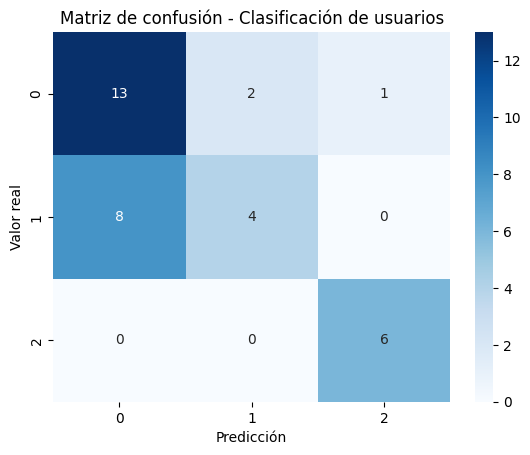


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.62      0.81      0.70        16
           1       0.67      0.33      0.44        12
           2       0.86      1.00      0.92         6

    accuracy                           0.68        34
   macro avg       0.71      0.72      0.69        34
weighted avg       0.68      0.68      0.65        34



In [ ]:
# Matriz de confusión. Crea una tabla que cruza los valores reales (Y_test) con los valores predichos (Y_pred).

print("Matriz de confusión:")
cm = confusion_matrix(Y_test, Y_pred, labels=modelo.classes_)

# Mapa de calor para visualizar mejor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.title("Matriz de confusión - Clasificación de usuarios")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

print("\nReporte de clasificación:")
print(classification_report(Y_test, Y_pred))


##**Cómo usar el modelo ya entrenado para hacer predicciones en datos nuevos.**

In [ ]:
# Clasificación de nuevos usuarios simulados
# Nuevos usuarios ficticios
nuevos_usuarios = pd.DataFrame({
    'duracion': [10, 300, 1200],
    'paginas': [2, 5, 1],
    'acciones': [10, 30, 5],
    'valor': [40, 120, 20]
})

# Predicción
predicciones = modelo.predict(nuevos_usuarios)
print("Predicción para nuevos usuarios:", predicciones)


Predicción para nuevos usuarios: [0 0 1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


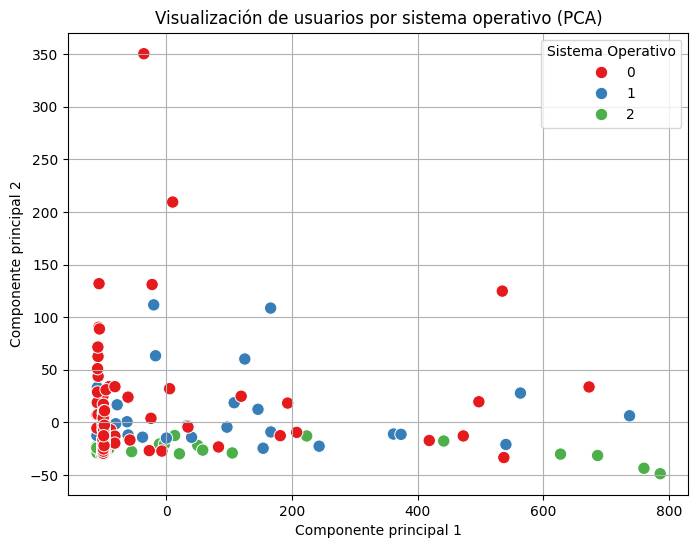

In [ ]:
# Visualización en 2D con PCA
from sklearn.decomposition import PCA

# Aplicamos PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Creamos un DataFrame para graficar
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['clase'] = Y

# Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='clase', palette='Set1', s=80)
plt.title('Visualización de usuarios por sistema operativo (PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid(True)
plt.legend(title='Sistema Operativo')
plt.show()


##**Interpretación**

La visualización con PCA permite observar cómo se distribuyen los usuarios en función de sus características.

Aunque PCA no garantiza una separación perfecta entre clases, ayuda a detectar patrones y agrupamientos.

Si las clases se superponen mucho, podría ser útil explorar otras técnicas como t-SNE o agregar nuevas variables.

*En resumen,* el gráfico te muestra visualmente por qué las métricas de tu modelo (como la precisión) podrían no ser perfectas. La mezcla de puntos significa que las características de tus usuarios son muy parecidas, independientemente de su sistema operativo, lo que dificulta la tarea del modelo de machine learning de clasificarlos correctamente.